In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import itertools
from matplotlib import cm

import os
import seaborn as sns
from os import listdir
from os.path import isfile, join
import scipy.stats as stats

In [2]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 10}

mpl.rc('font', **font)

In [3]:
savefilesto = '/Volumes/SAF_Data/Colloquium22/scratch'

In [41]:
csvname = 'bars-regroup-Sunday.xlsx'
combinednm = 'agubh2-10km-allpkgdata.xlsx'
modelrun = '0hfld-agubh2_10km/'

mypath = f'/Volumes/SAF_Data/NAYS2DH_files/Data/BarCSVs/Sp2022/2ndTake/{csvname}'
# savefilesto = '/Volumes/SAF_MSCWORK/Python/Stratigraphy/Plots/barpkgs/'

megamerge = pd.read_excel(f'{mypath}', sheet_name = 'allbars')#, usecols = 'B:')#
mm_pp = pd.read_excel(f'{mypath}', sheet_name = 'allbarsbc')#, usecols = 'B:')#
mm_pp_cond = pd.read_excel(f'{mypath}', sheet_name = 'allbarsbc_cond')

colours =['#ff8500', '#ffa911', '#ffca20', '#ffe67d', '#de8cee', '#bf74e7', '#a05ce1', '#8044da']


Make seaborn pairplot to explore all of the data

In [38]:
crop2data = copy.deepcopy(mm_pp)
crop2data = crop2data.drop(labels = ['BarName', 'Facies', 'Coherence', 'VertAgg', 'BasRelief', 'LeftEdge', 'RightEdge', 'notes'], axis = 1)

crop2data_cond = copy.deepcopy(mm_pp_cond)
crop2data_cond = crop2data_cond.drop(labels = ['BarName', 'Facies', 'Coherence', 'VertAgg', 'BasRelief', 'LeftEdge', 'RightEdge', 'notes'], axis = 1)


In [39]:
crop2data['CVFlowDepth'] = crop2data['SDFlowDepth']/crop2data['MeanFlowDepth']
crop2data_cond['CVFlowDepth'] = crop2data_cond['SDFlowDepth']/crop2data_cond['MeanFlowDepth']

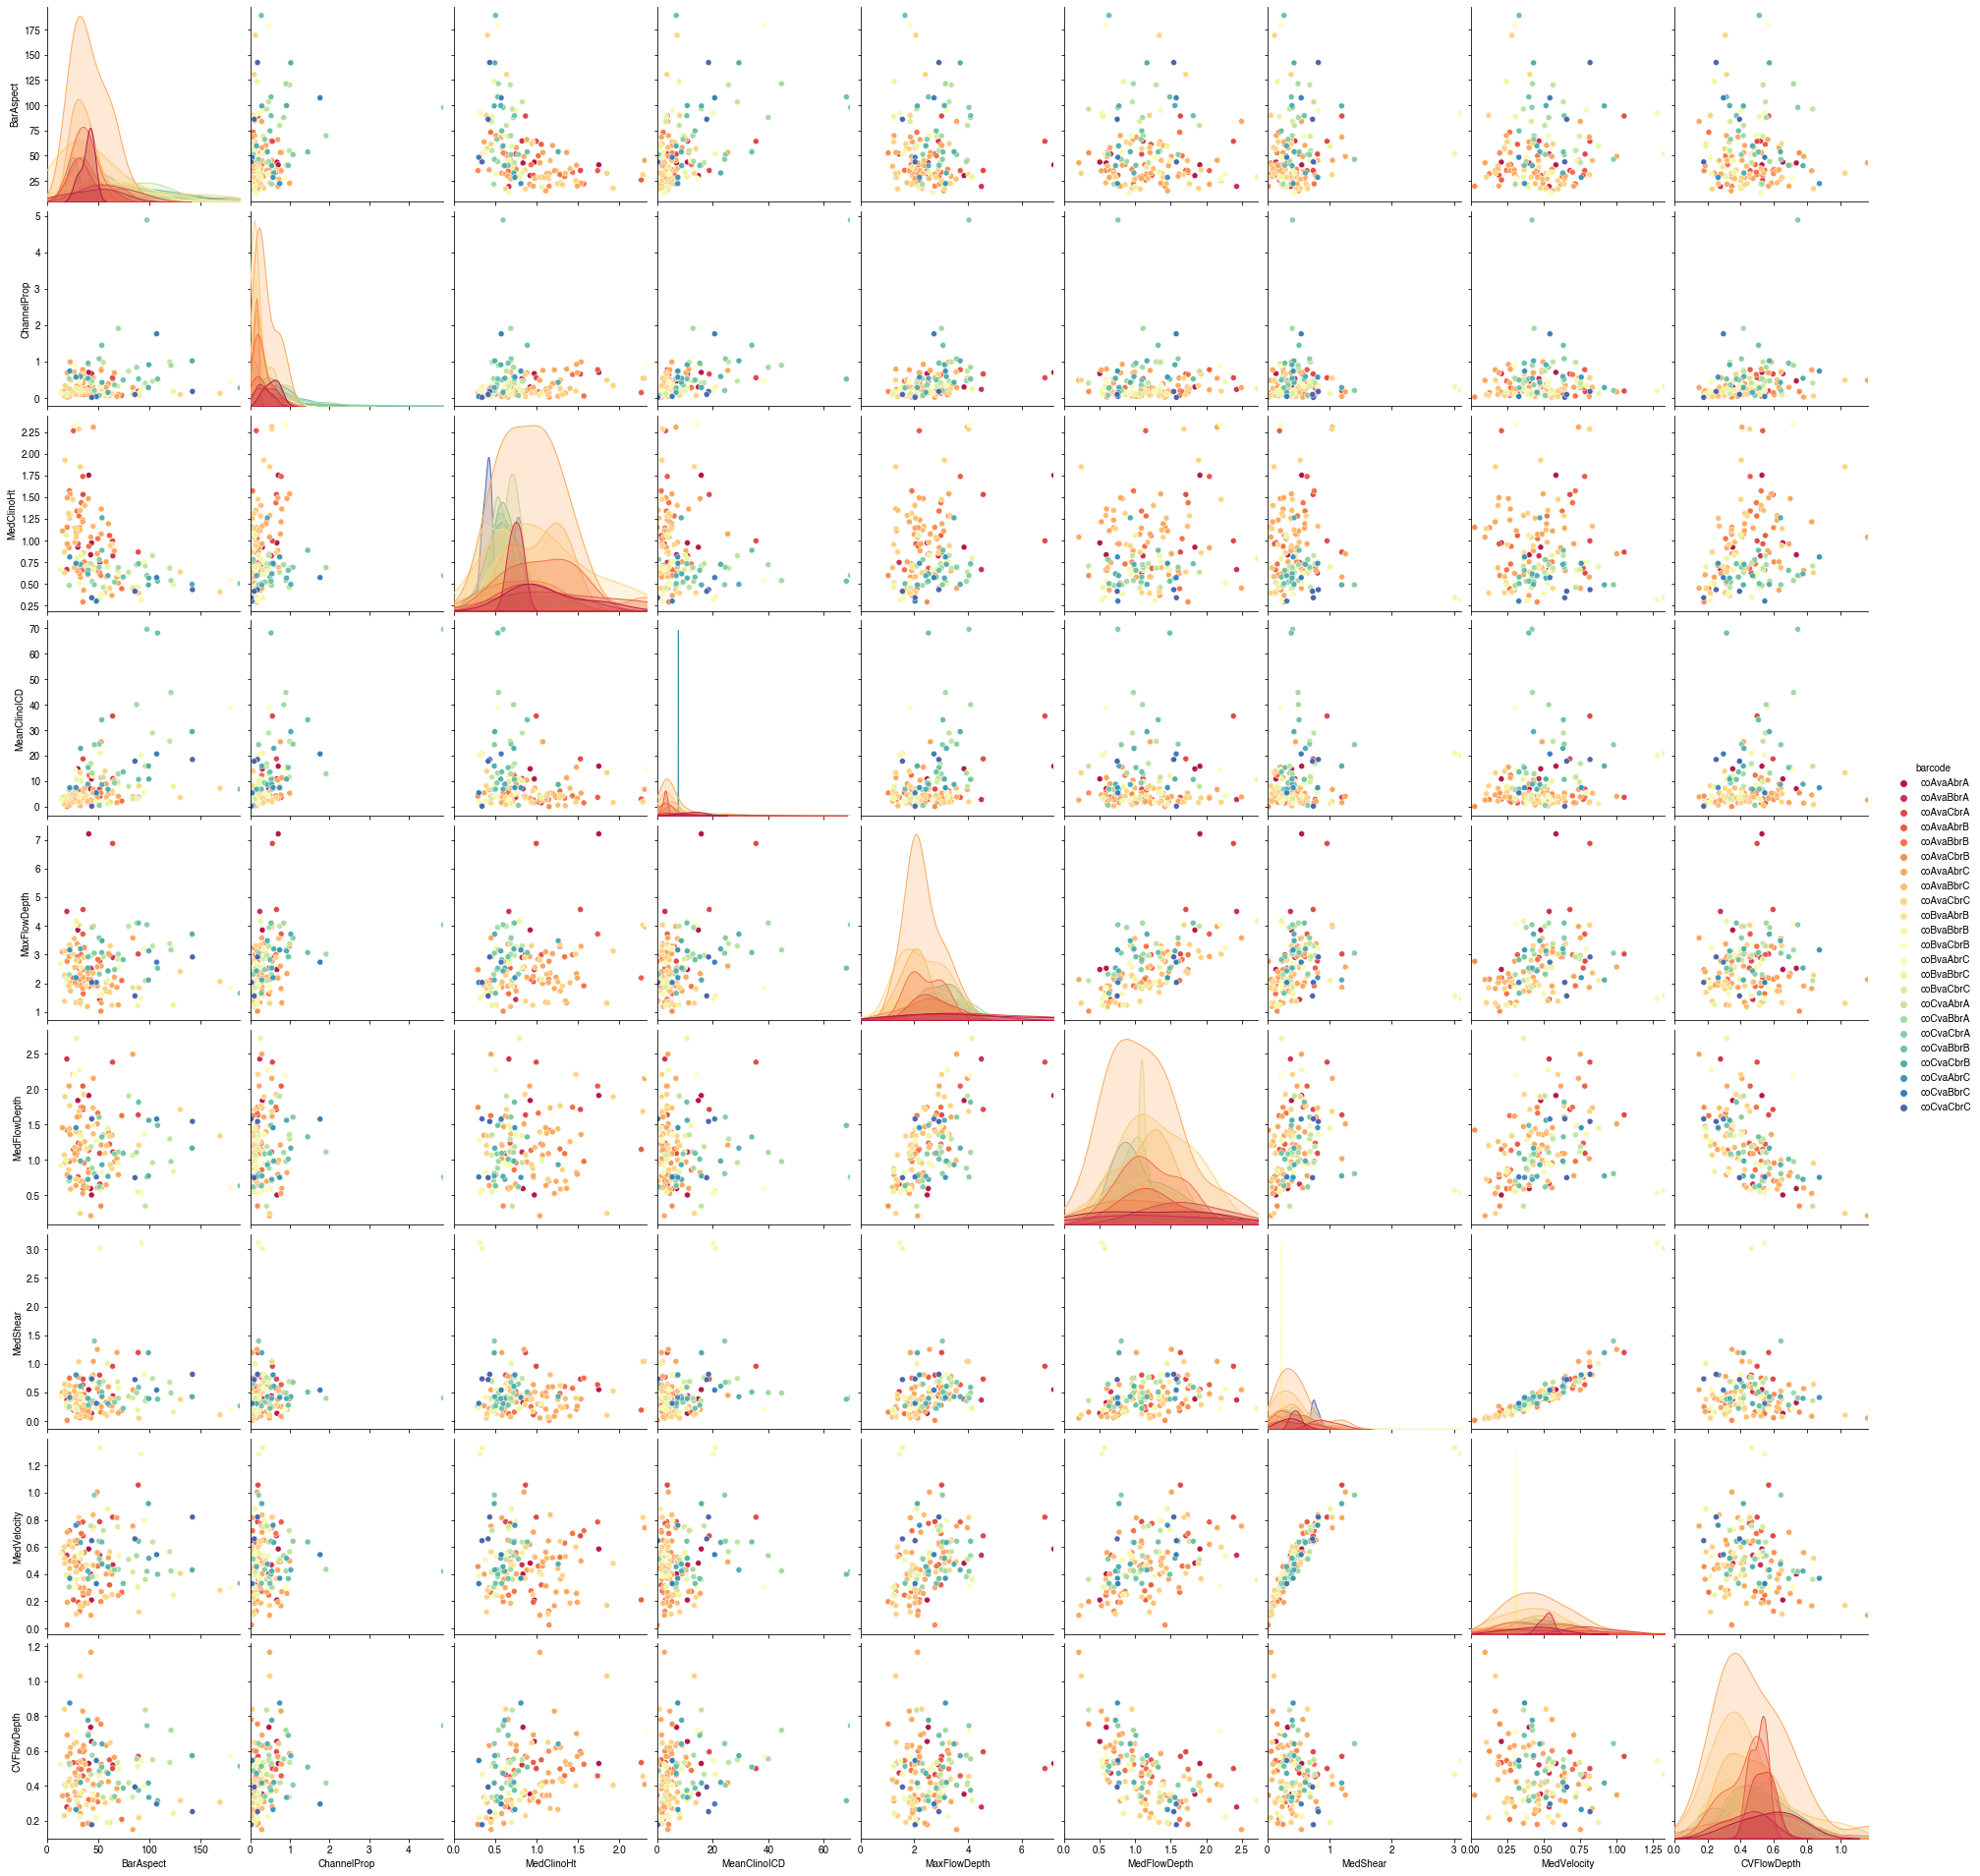

In [35]:
pplot = sns.pairplot(crop2data, vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth'], hue = 'barcode', height = 3, aspect = 1, palette = 'Spectral')
snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(0, crop2data[v].max()))
    
# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot.png', dpi = 200)

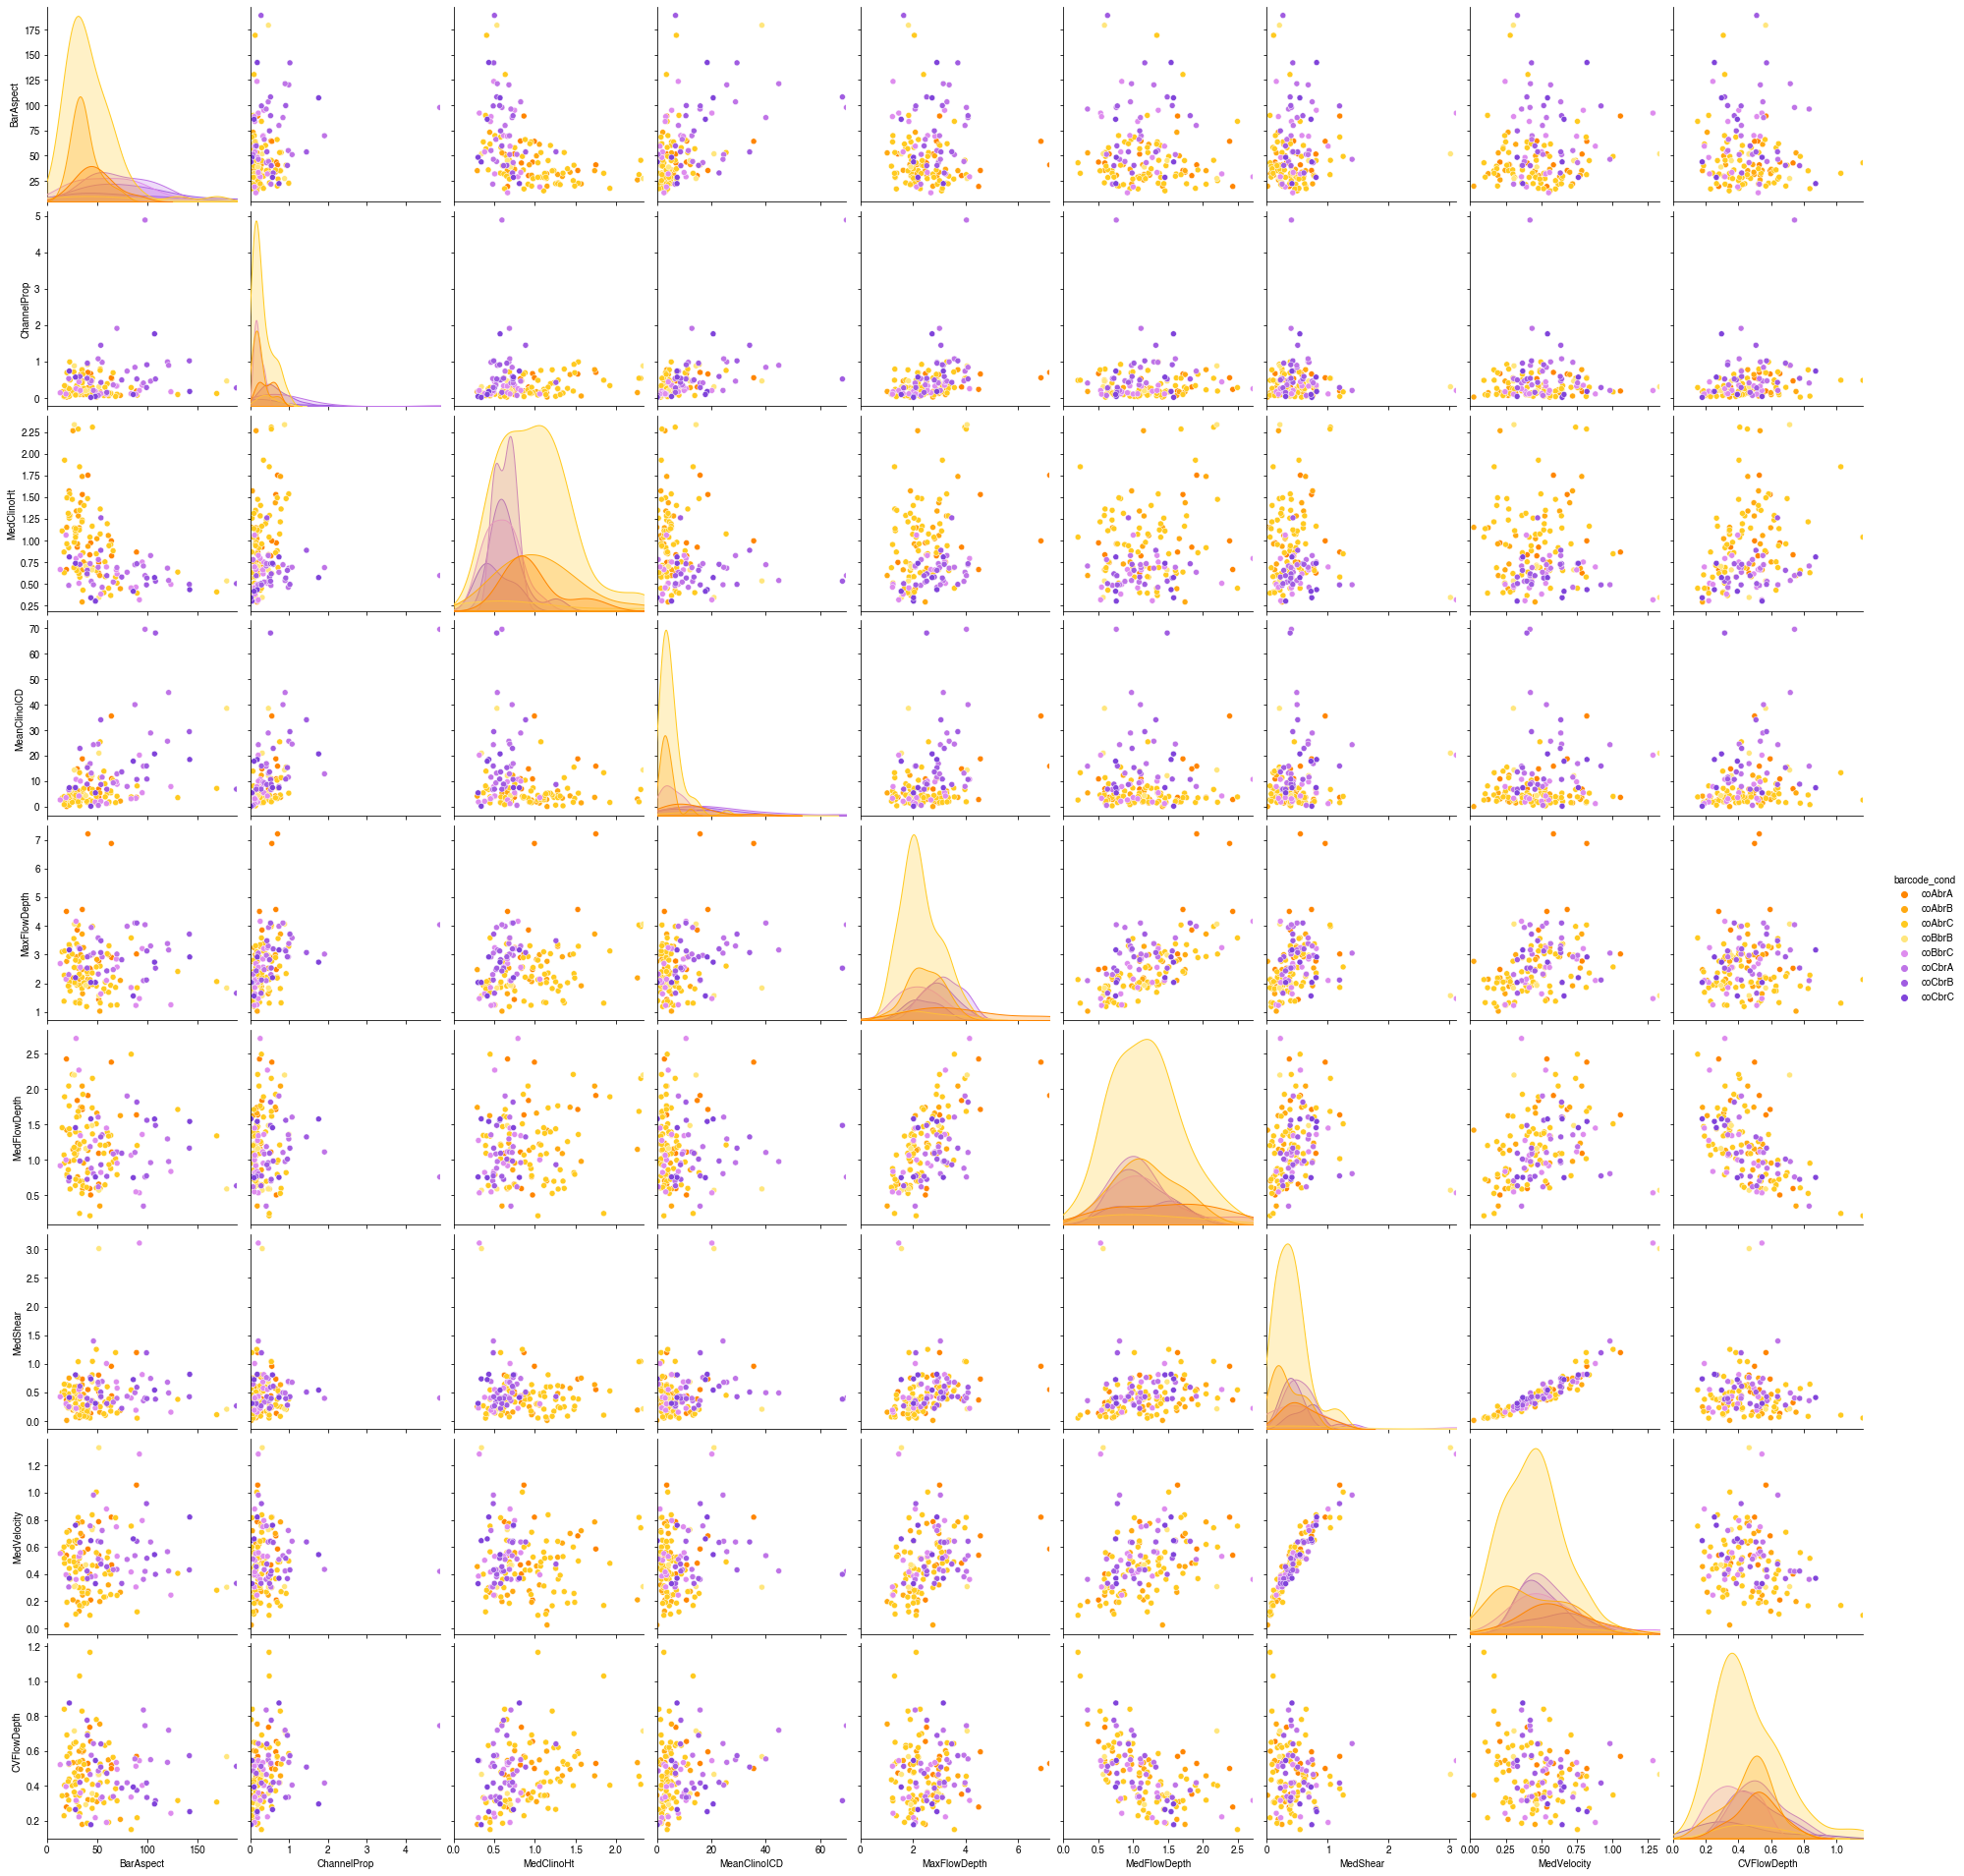

In [42]:
colpalette = sns.set_palette(sns.color_palette(colours))

pplot = sns.pairplot(crop2data_cond, vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth'], hue = 'barcode_cond', height = 3, aspect = 1, palette = colpalette)
snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                'MedShear', 'MedVelocity', 'CVFlowDepth']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(0, crop2data_cond[v].max()))
    
# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cond.png', dpi = 200)

testf, testbins = np.histogramdd((megamerge['Coherence'], megamerge['VertAgg'], megamerge['BasRelief']))

In [10]:
coABvaABbrAB = pd.read_excel(mypath, sheet_name = 'coAB-vaAB-brAB') #bar accretion, thread sliding.
coABvaABbrC = pd.read_excel(mypath, sheet_name = 'coAB-vaAB-brC') #bar aggradation and relocation
coABvaCbrAB = pd.read_excel(mypath, sheet_name = 'coAB-vaC-brAB') # poorly preserved, toes
coABvaCbrC = pd.read_excel(mypath, sheet_name = 'coAB-vaC-brC') # thread infill
coCvaABbrAB = pd.read_excel(mypath, sheet_name = 'coC-vaAB-brAB') # coherent thread difffusivity, thread jumpint
coCvaABbrC = pd.read_excel(mypath, sheet_name = 'coC-vaAB-brC') # incoherent thread, thread splitting
coCvaCbrAB = pd.read_excel(mypath, sheet_name = 'coC-vaC-brAB') # incoherent thread, thread splitting
coCvaCbrC= pd.read_excel(mypath, sheet_name = 'coC-vaC-brC') # incoherent thread, thread splitting

Import colours and package labels

For the newest condensation

coAbrA = mm_pp_cond[mm_pp_cond['barcode_cond']=='coAbrA']
coAbrB = mm_pp_cond[mm_pp_cond['barcode_cond']=='coAbrB']
coAbrC = mm_pp_cond[mm_pp_cond['barcode_cond']=='coAbrC']
coBbrB = mm_pp_cond[mm_pp_cond['barcode_cond']=='coBbrB']
coBbrC = mm_pp_cond[mm_pp_cond['barcode_cond']=='coBbrC']
coCbrA = mm_pp_cond[mm_pp_cond['barcode_cond']=='coAbrA']
coCbrB = mm_pp_cond[mm_pp_cond['barcode_cond']=='coBbrB']
coCbrC = mm_pp_cond[mm_pp_cond['barcode_cond']=='coCbrC']

In [43]:
colours =['#ff8500', '#ffa911', '#ffca20', '#ffe67d', '#de8cee', '#bf74e7', '#a05ce1', '#8044da']
labels = ['coAB-vaAB-brAB', 'coAB-vaAB-brC', 'coAB-vaC-brAB', 'coAB-vaC-brC', 'coC-vaAB-brAB', 'coC-vaAB-brC', 'coC-vaC-brAB', 'coC-vaC-brC']


Import all variables into one dataframe for each variable, for each package type.

In [44]:
bardataframes =['ElapsedTime', 
                'BarWidth', 
                'BarHeight', 
                'BarAspect', 
                'BarArea', 
                'Section Area', 
                'ChannelProp', 
                'MinClinoHt','MaxClinoHt', 'ModeClinoHt', 'MeanClinoHt', 'SDClinoHt', 'MedClinoHt',
                'MinClinoWt','MaxClinoWt', 'ModeClinoWt', 'MeanClinoWt', 'SDClinoWt', 'MedClinoWt',
                'MaxClinoICD', 'MeanClinoICD', 'SDClinoICD', 'MedClinoICD',
                'MinFlowDepth', 'MaxFlowDepth', 'ModeFlowDepth', 'MeanFlowDepth', 'SDFlowDepth', 'MedFlowDepth',
                'MinShear', 'MaxShear', 'ModeShear', 'MeanShear', 'SDShear', 'MedShear',
                'MinVelocity', 'MaxVelocity', 'ModeVelocity', 'MeanVelocity', 'SDVelocity', 'MedVelocity',
                ]

bar_time = pd.DataFrame(columns=bardataframes)
bar_width = pd.DataFrame(columns=bardataframes)
bar_height = pd.DataFrame(columns=bardataframes)
bar_w_to_h = pd.DataFrame(columns=bardataframes)
bar_area = pd.DataFrame(columns=bardataframes)
xs_area  = pd.DataFrame(columns=bardataframes)
prop_area = pd.DataFrame(columns=bardataframes)
min_ht = pd.DataFrame(columns=bardataframes)
max_ht = pd.DataFrame(columns=bardataframes)
mod_ht = pd.DataFrame(columns=bardataframes)
mean_ht = pd.DataFrame(columns=bardataframes)
stddev_ht = pd.DataFrame(columns=bardataframes)
med_ht = pd.DataFrame(columns=bardataframes)
min_wt = pd.DataFrame(columns=bardataframes)
max_wt = pd.DataFrame(columns=bardataframes)
mod_wt = pd.DataFrame(columns=bardataframes)
mean_wt = pd.DataFrame(columns=bardataframes)
stddev_wt = pd.DataFrame(columns=bardataframes)
med_wt = pd.DataFrame(columns=bardataframes)
max_icd = pd.DataFrame(columns=bardataframes)
mean_icd = pd.DataFrame(columns=bardataframes)
stddev_icd = pd.DataFrame(columns=bardataframes)
med_icd = pd.DataFrame(columns=bardataframes)
min_depth = pd.DataFrame(columns=bardataframes)
max_depth = pd.DataFrame(columns=bardataframes)
mod_depth  = pd.DataFrame(columns=bardataframes)
mean_depth = pd.DataFrame(columns=bardataframes)
stddev_depth = pd.DataFrame(columns=bardataframes)
med_depth = pd.DataFrame(columns=bardataframes)
min_shear = pd.DataFrame(columns=bardataframes)
max_shear = pd.DataFrame(columns=bardataframes)
mod_shear = pd.DataFrame(columns=bardataframes)
mean_shear = pd.DataFrame(columns=bardataframes)
stddev_shear = pd.DataFrame(columns=bardataframes)
med_shear  = pd.DataFrame(columns=bardataframes)
min_vel = pd.DataFrame(columns=bardataframes)
max_vel = pd.DataFrame(columns=bardataframes)
mod_vel = pd.DataFrame(columns=bardataframes)
mean_vel  = pd.DataFrame(columns=bardataframes)
stddev_vel = pd.DataFrame(columns=bardataframes)
med_vel = pd.DataFrame(columns=bardataframes)

dflist = [bar_time, bar_width, bar_height, bar_w_to_h, bar_area, xs_area, prop_area,
                            min_ht, max_ht, mod_ht, mean_ht, stddev_ht, med_ht,
                            min_wt, max_wt, mod_wt, mean_wt, stddev_wt, med_wt,
                            max_icd, mean_icd, stddev_icd, med_icd,
                            min_depth, max_depth, mod_depth, mean_depth, stddev_depth, med_depth, 
                            min_shear, max_shear, mod_shear, mean_shear, stddev_shear, med_shear, 
                            min_vel, max_vel, mod_vel, mean_vel, stddev_vel, med_vel]

sheetlist = [coABvaABbrAB, coABvaABbrC, coABvaCbrAB, coABvaCbrC, coCvaABbrAB, coCvaABbrC, coCvaCbrAB, coCvaCbrC]
for df in range (0, len(dflist)):
    dflist[df] = pd.concat(([coABvaABbrAB[bardataframes[df]], 
                            coABvaABbrC[bardataframes[df]], 
                            coABvaCbrAB[bardataframes[df]], 
                            coABvaCbrC[bardataframes[df]], 
                            coCvaABbrAB[bardataframes[df]], 
                            coCvaABbrC[bardataframes[df]],
                           coCvaCbrAB[bardataframes[df]], 
                           coCvaCbrC[bardataframes[df]]]), axis = 1)#, axis = 0, ignore_index = True)


In [45]:
bar_time = copy.deepcopy(dflist[0])
bar_width = copy.deepcopy(dflist[1])
bar_height = copy.deepcopy(dflist[2])
bar_w_to_h = copy.deepcopy(dflist[3])
bar_area = copy.deepcopy(dflist[4])
xs_area  = copy.deepcopy(dflist[5])
prop_area = copy.deepcopy(dflist[6])
min_ht = copy.deepcopy(dflist[7])
max_ht = copy.deepcopy(dflist[8])
mod_ht = copy.deepcopy(dflist[9])
mean_ht = copy.deepcopy(dflist[10])
stddev_ht = copy.deepcopy(dflist[11])
med_ht = copy.deepcopy(dflist[12])
min_wt = copy.deepcopy(dflist[13])
max_wt = copy.deepcopy(dflist[14])
mod_wt = copy.deepcopy(dflist[15])
mean_wt = copy.deepcopy(dflist[16])
stddev_wt = copy.deepcopy(dflist[17])
med_wt = copy.deepcopy(dflist[18])
max_icd = copy.deepcopy(dflist[19])
mean_icd = copy.deepcopy(dflist[20])
stddev_icd = copy.deepcopy(dflist[21])
med_icd = copy.deepcopy(dflist[22])
min_depth = copy.deepcopy(dflist[23])
max_depth = copy.deepcopy(dflist[24])
mod_depth  = copy.deepcopy(dflist[25])
mean_depth = copy.deepcopy(dflist[26])
stddev_depth = copy.deepcopy(dflist[27])
med_depth = copy.deepcopy(dflist[28])
min_shear = copy.deepcopy(dflist[29])
max_shear = copy.deepcopy(dflist[30])
mod_shear = copy.deepcopy(dflist[31])
mean_shear = copy.deepcopy(dflist[32])
stddev_shear = copy.deepcopy(dflist[33])
med_shear  = copy.deepcopy(dflist[34])
min_vel = copy.deepcopy(dflist[35])
max_vel = copy.deepcopy(dflist[36])
mod_vel = copy.deepcopy(dflist[37])
mean_vel  = copy.deepcopy(dflist[38])
stddev_vel = copy.deepcopy(dflist[39])
med_vel = copy.deepcopy(dflist[40])
cv_ht = np.true_divide(stddev_ht, mean_ht, where = ~np.isnan(stddev_ht))
dep_cv = np.true_divide(stddev_depth, mean_depth, where=~np.isnan(stddev_depth))
pkg_flowdepth = np.true_divide(max_depth, bar_height, where = ~np.isnan(max_depth))
clino_flowdepth = np.true_divide(max_depth, max_ht, where = ~np.isnan(max_depth))
medclino_flowdepth = np.true_divide(med_depth, max_ht, where = ~np.isnan(max_depth))

/var/folders/yg/89nlrh5x2xzgdlgr2bczm4_m0000gn/T/ipykernel_89219/1944141717.py:42: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  cv_ht = np.true_divide(stddev_ht, mean_ht, where = ~np.isnan(stddev_ht))
/var/folders/yg/89nlrh5x2xzgdlgr2bczm4_m0000gn/T/ipykernel_89219/1944141717.py:43: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be align

In [14]:
## describing bar geometry
geom_var_ls = [bar_time, bar_height, bar_w_to_h, prop_area, cv_ht]
geom_var_nm = ['Elapsed Time', 'Package Height', 'Package Aspect', 'Proportion of Area', 'CV Clinoform Height']

## describing bar scaling realtionships and mobility
scalers_ls =[pkg_flowdepth, clino_flowdepth, medclino_flowdepth, med_icd] 
scalers_nm = ['Max Depth/Package Height', 'Max Depth/Max Clino Height', 'Med Depth/Clino Height', 'Median ICD']

## describing the hydraulics 
hydraulics_ls = [max_depth, med_depth, dep_cv, med_shear, med_vel]
hydraulics_nm = ['Max Flow Depth', 'Median Flow Depth', 'FlowDepCV', 'Median Shear Stress', 'Median Flow Velocity'] 

In [17]:
## find the last value in each distribution of abr types
AAAlen = len(bar_time.iloc[:, 0][~np.isnan(bar_time.iloc[:, 0])])
AAClen = len(bar_time.iloc[:, 1][~np.isnan(bar_time.iloc[:, 1])])
ACAlen = len(bar_time.iloc[:, 2][~np.isnan(bar_time.iloc[:, 2])])
ACClen = len(bar_time.iloc[:, 3][~np.isnan(bar_time.iloc[:, 3])])
CAAlen = len(bar_time.iloc[:, 4][~np.isnan(bar_time.iloc[:, 4])])
CAClen = len(bar_time.iloc[:, 5][~np.isnan(bar_time.iloc[:, 5])])
CCAlen = len(bar_time.iloc[:, 6][~np.isnan(bar_time.iloc[:, 6])])
CCClen = len(bar_time.iloc[:, 7][~np.isnan(bar_time.iloc[:, 7])])

## March 2022, Box plots

### Cluster 1: Bar Geometry, Flow Hydraulics and Scaling Relationships

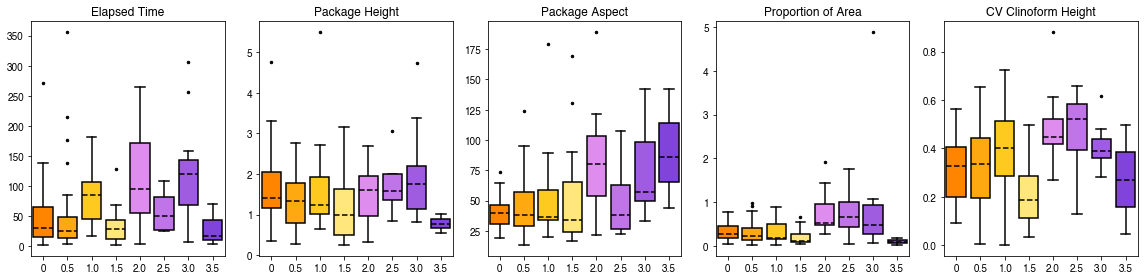

In [27]:
fig, ax = plt.subplots(1, len(geom_var_ls), figsize = (16, 4), tight_layout = True, sharex = False, squeeze = True)

ax = ax.ravel()

medianprops = dict(linestyle='--', linewidth=1.5, color='k')
boxprops = dict(linestyle='--', linewidth=1.5, color='black')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')
capprops = dict(linestyle='-', linewidth=1.5, color='black')
bplotaxes = range(0, len(geom_var_ls))
flierprops = dict(marker = 'o', markersize = '2.5', color = 'black', mfc = 'k')

for a in bplotaxes:
    ax[a].set_xlim(-0.25, 3.75)

for idx, var in enumerate(geom_var_ls): ## for each boxplot axis

    bplotAAA = ax[bplotaxes[idx]].boxplot(var.iloc[:AAAlen, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotAAC = ax[bplotaxes[idx]].boxplot(var.iloc[:AAClen, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotACA = ax[bplotaxes[idx]].boxplot(var.iloc[:ACAlen, 2], patch_artist = True, positions = [1.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotACC = ax[bplotaxes[idx]].boxplot(var.iloc[:ACClen, 3], patch_artist = True, positions = [1.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCAA = ax[bplotaxes[idx]].boxplot(var.iloc[:CAAlen, 4], patch_artist = True, positions = [2.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCAC = ax[bplotaxes[idx]].boxplot(var.iloc[:CAClen, 5], patch_artist = True, positions = [2.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCCA = ax[bplotaxes[idx]].boxplot(var.iloc[:CCAlen, 6], patch_artist = True, positions = [3.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCCC = ax[bplotaxes[idx]].boxplot(var.iloc[:CCClen, 7], patch_artist = True, positions = [3.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    
    bplotlist = [bplotAAA, bplotAAC, bplotACA, bplotACC, bplotCAA, bplotCAC, bplotCCA, bplotCCC]    

    ax[bplotaxes[idx]].set_title(geom_var_nm[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])

### Cluster 2: Flow Hydraulics

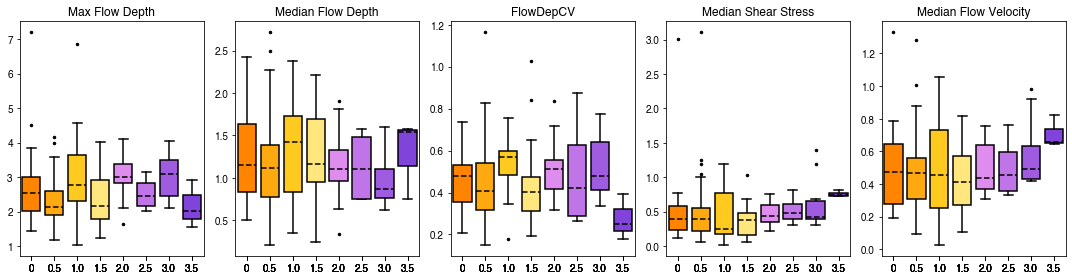

In [35]:
fig, ax = plt.subplots(1, len(hydraulics_ls), figsize = (15, 4), tight_layout = True, sharex = True, squeeze = True)
ax[0].set_xlim(-.25,3.75)
ax = ax.ravel()

medianprops = dict(linestyle='--', linewidth=1.5, color='k')
boxprops = dict(linestyle='--', linewidth=1.5, color='black')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')
capprops = dict(linestyle='-', linewidth=1.5, color='black')
bplotaxes = range(0, len(geom_var_ls))
flierprops = dict(marker = 'o', markersize = '2.5', color = 'black', mfc = 'k')

for idx, var in enumerate(hydraulics_ls): ## for each boxplot axis

    bplotAAA = ax[bplotaxes[idx]].boxplot(var.iloc[:AAAlen, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotAAC = ax[bplotaxes[idx]].boxplot(var.iloc[:AAClen, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotACA = ax[bplotaxes[idx]].boxplot(var.iloc[:ACAlen, 2], patch_artist = True, positions = [1.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotACC = ax[bplotaxes[idx]].boxplot(var.iloc[:ACClen, 3], patch_artist = True, positions = [1.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCAA = ax[bplotaxes[idx]].boxplot(var.iloc[:CAAlen, 4], patch_artist = True, positions = [2.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCAC = ax[bplotaxes[idx]].boxplot(var.iloc[:CAClen, 5], patch_artist = True, positions = [2.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCCA = ax[bplotaxes[idx]].boxplot(var.iloc[:CCAlen, 6], patch_artist = True, positions = [3.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCCC = ax[bplotaxes[idx]].boxplot(var.iloc[:CCClen, 7], patch_artist = True, positions = [3.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    
    bplotlist = [bplotAAA, bplotAAC, bplotACA, bplotACC, bplotCAA, bplotCAC, bplotCCA, bplotCCC]    
    
    ax[bplotaxes[idx]].set_title(hydraulics_nm[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
        

### Cluster 3: Scalers

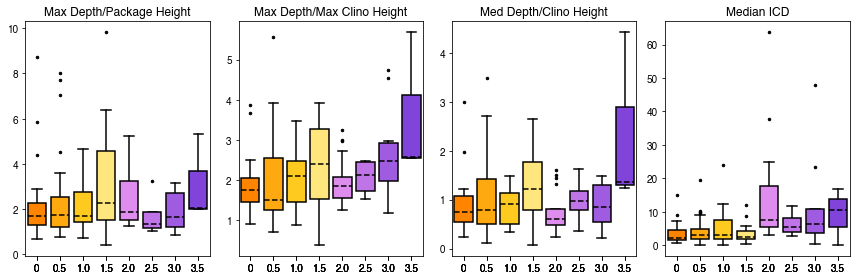

In [29]:
fig, ax = plt.subplots(1, len(scalers_ls), figsize = (12, 4), tight_layout = True, sharex = True, squeeze = True)
ax[0].set_xlim(-.25, 3.75)
ax = ax.ravel()

medianprops = dict(linestyle='--', linewidth=1.5, color='k')
boxprops = dict(linestyle='--', linewidth=1.5, color='black')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')
capprops = dict(linestyle='-', linewidth=1.5, color='black')
bplotaxes = range(0, len(geom_var_ls))
flierprops = dict(marker = 'o', markersize = '2.5', color = 'black', mfc = 'k')

for idx, var in enumerate(scalers_ls): ## for each boxplot axis

    
    bplotAAA = ax[bplotaxes[idx]].boxplot(var.iloc[:AAAlen, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotAAC = ax[bplotaxes[idx]].boxplot(var.iloc[:AAClen, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotACA = ax[bplotaxes[idx]].boxplot(var.iloc[:ACAlen, 2], patch_artist = True, positions = [1.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotACC = ax[bplotaxes[idx]].boxplot(var.iloc[:ACClen, 3], patch_artist = True, positions = [1.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCAA = ax[bplotaxes[idx]].boxplot(var.iloc[:CAAlen, 4], patch_artist = True, positions = [2.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCAC = ax[bplotaxes[idx]].boxplot(var.iloc[:CAClen, 5], patch_artist = True, positions = [2.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCCA = ax[bplotaxes[idx]].boxplot(var.iloc[:CCAlen, 6], patch_artist = True, positions = [3.0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotCCC = ax[bplotaxes[idx]].boxplot(var.iloc[:CCClen, 7], patch_artist = True, positions = [3.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    
    bplotlist = [bplotAAA, bplotAAC, bplotACA, bplotACC, bplotCAA, bplotCAC, bplotCCA, bplotCCC]    
    ax[bplotaxes[idx]].set_title(scalers_nm[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
        

### Cross Plots

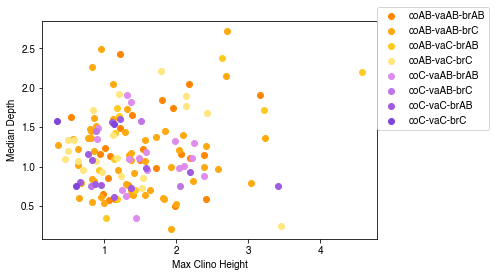

In [101]:
for i in range (0, bar_time.shape[1]):
    plt.scatter(max_ht.iloc[:, i], med_depth.iloc[:, i], c = colours[i], label = labels[i])
plt.xlabel('Max Clino Height')
plt.ylabel('Median Depth')
plt.legend(loc = [1, .5])

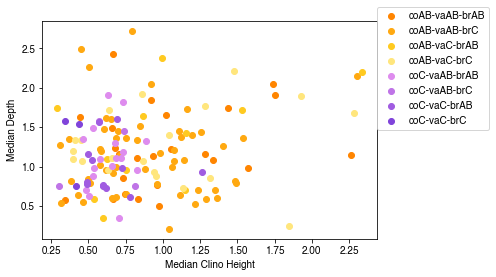

In [102]:
for i in range (0, bar_time.shape[1]):
    plt.scatter(med_ht.iloc[:, i], med_depth.iloc[:, i], c = colours[i], label = labels[i])
plt.xlabel('Median Clino Height')
plt.ylabel('Median Depth')
plt.legend(loc = [1, .5])

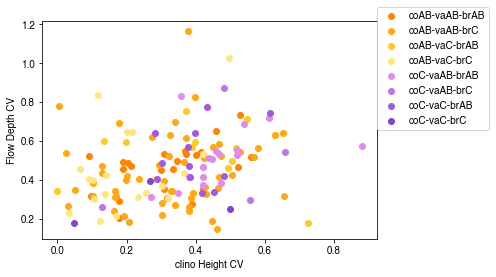

In [106]:
for i in range (0, bar_time.shape[1]):
    plt.scatter(stddev_ht.iloc[:, i]/mean_ht.iloc[:, i], (stddev_depth.iloc[:, i])/(mean_depth.iloc[:, i]), c = colours[i], label = labels[i])
plt.xlabel('clino Height CV')
plt.ylabel('Flow Depth CV')
plt.legend(loc = [1, .5])

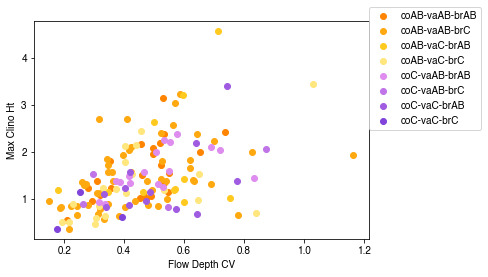

In [104]:
for i in range (0, bar_time.shape[1]):
    plt.scatter((stddev_depth.iloc[:, i])/(mean_depth.iloc[:, i]), max_ht.iloc[:, i], c = colours[i], label = labels[i])
plt.xlabel('Flow Depth CV')
plt.ylabel('Max Clino Ht')
plt.legend(loc = [1, .5])

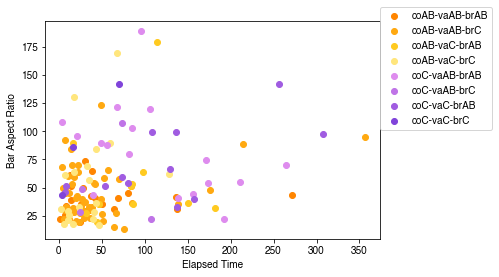

In [63]:
for i in range (0, bar_time.shape[1]):
    plt.scatter(bar_time.iloc[:, i], bar_w_to_h.iloc[:, i], c = colours[i], label = labels[i])
plt.xlabel('Elapsed Time')
plt.ylabel('Bar Aspect Ratio')
plt.legend(loc = [1, .5])

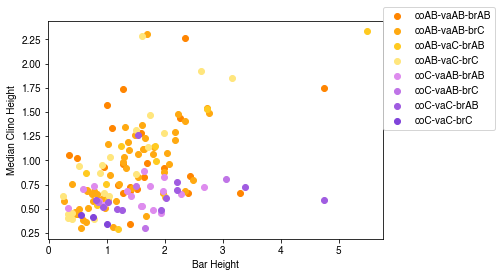

In [66]:
for i in range (0, bar_time.shape[1]):
    plt.scatter(bar_height.iloc[:, i], med_ht.iloc[:, i], c = colours[i], label = labels[i])
plt.xlabel('Bar Height')
plt.ylabel('Median Clino Height')
plt.legend(loc = [1, .5])

Number of timespans for each bar

Text(0, 0.5, 'Frequency')

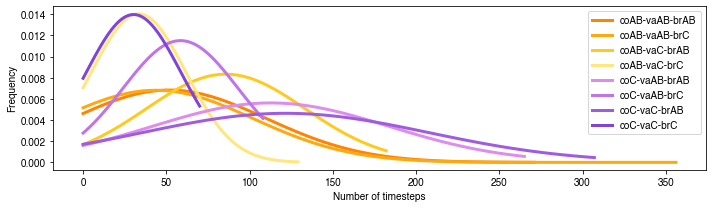

In [68]:
plt.figure(figsize = (10,3), tight_layout = True)
for i, var in enumerate(sheetlist):
    loc = np.nanmean(bar_time.iloc[:, i])
    scale = np.std(bar_time.iloc[:, i])

    x = np.linspace(0, (bar_time.iloc[:, i].max()))
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i], lw = 3)
plt.legend()
plt.xlabel('Number of timesteps')
plt.ylabel('Frequency')
#plt.xlim(0,310)
#plt.ylim(0, 1)


Flow Depth

Text(0, 0.5, 'Frequency')

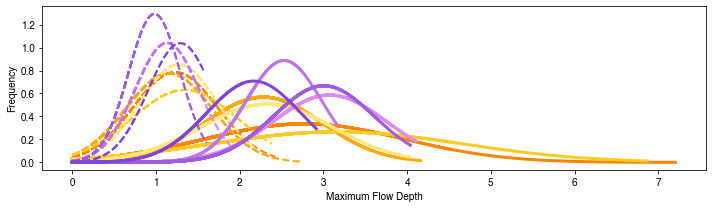

In [70]:
plt.figure(figsize = (10,3), tight_layout = True)
for i, var in enumerate(sheetlist):
    loc = np.nanmean(max_depth.iloc[:, i])
    scale = np.std(max_depth.iloc[:, i])

    x = np.linspace(0, (max_depth.iloc[:, i]))
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i], lw = 3)
    
    loc = np.nanmean(med_depth.iloc[:, i])
    scale = np.std(med_depth.iloc[:, i])

    x = np.linspace(0, (med_depth.iloc[:, i]))
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
    plt.plot(x, y, c = colours[i], lw = 2, ls = '--')
    
# plt.legend()
plt.xlabel('Maximum Flow Depth')
plt.ylabel('Frequency')
#plt.xlim(0,310)
#plt.ylim(0, 1)


Flow Velocity

Text(0, 0.5, 'Frequency')

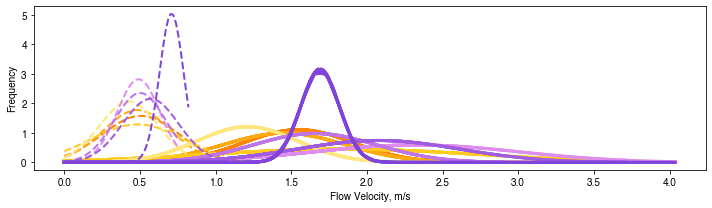

In [73]:
plt.figure(figsize = (10,3), tight_layout = True)
for i, var in enumerate(sheetlist):
    loc = np.nanmean(max_vel.iloc[:, i])
    scale = np.std(max_vel.iloc[:, i])

    x = np.linspace(0, max_vel.max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i], lw = 3)
    
    loc = np.nanmean(med_vel.iloc[:, i])
    scale = np.std(med_vel.iloc[:, i])

    x = np.linspace(0, med_vel.iloc[:, i].max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
    plt.plot(x, y, c = colours[i], lw = 2, ls = '--')
    
# plt.legend()
plt.xlabel('Flow Velocity, m/s')
plt.ylabel('Frequency')
#plt.xlim(0,310)
#plt.ylim(0, 1)

Shear Stress

Text(0, 0.5, 'Frequency')

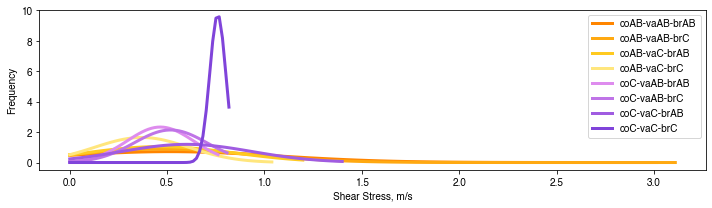

In [74]:
plt.figure(figsize = (10,3), tight_layout = True)
for i, var in enumerate(sheetlist):
#     loc = np.nanmean(var['MaxShear'])
#     scale = np.std(var['MaxShear'])

#     x = np.linspace(0, (var['MaxShear']).max())
#     y = stats.norm.pdf(x, loc, scale)
#     #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
#     plt.plot(x, y, label = labels[i], c = colours[i], lw = 3)
    
    
    loc = np.nanmean(med_shear.iloc[:, i])
    scale = np.std(med_shear.iloc[:, i])

    x = np.linspace(0, med_shear.iloc[:, i].max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i], lw = 3)
       
plt.legend()
plt.xlabel('Shear Stress, m/s')
plt.ylabel('Frequency')
#plt.xlim(0,310)
#plt.ylim(0, 1)

Flow Depth Scaling

Text(0, 0.5, 'Frequency')

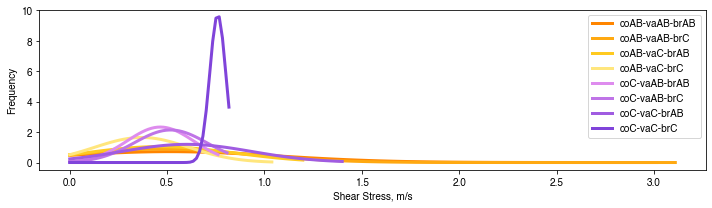

In [34]:
plt.figure(figsize = (10,3), tight_layout = True)
for i, var in enumerate(sheetlist):
#     loc = np.nanmean(var['MaxShear'])
#     scale = np.std(var['MaxShear'])

#     x = np.linspace(0, (var['MaxShear']).max())
#     y = stats.norm.pdf(x, loc, scale)
#     #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
#     plt.plot(x, y, label = labels[i], c = colours[i], lw = 3)
    
    
    loc = np.nanmean(var['MedShear'])
    scale = np.std(var['MedShear'])

    x = np.linspace(0, (var['MedShear']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['ElapsedTime'], fc = colours[i], ec = 'k', lw = '0', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i], lw = 3)
       
plt.legend()
plt.xlabel('Shear Stress, m/s')
plt.ylabel('Frequency')
#plt.xlim(0,310)1    71                   7                        
#plt.ylim(0, 1)

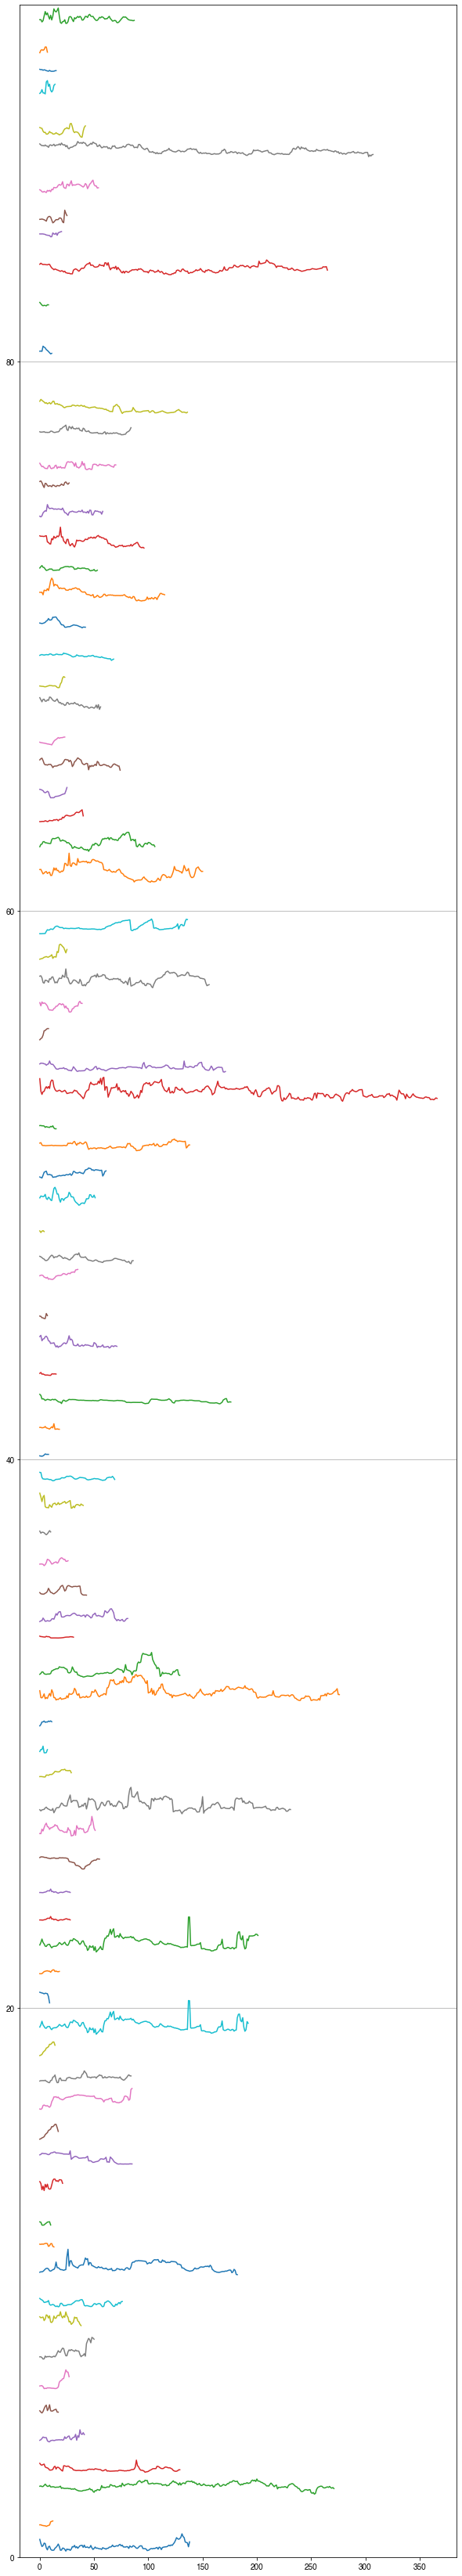

In [138]:
cvpath = '/Volumes/SAF_Data/NAYS2DH_files/Data/nparrays/flowdepth-cvs/'
plt.figure(figsize = (10, 60))
for i, file in enumerate(os.listdir(cvpath)):
    arr = np.load(f'{cvpath}{file}', allow_pickle=True)
    xvals = np.arange(0, len(arr))
    plt.plot(xvals, arr+i)
plt.ylim(0, i)
plt.grid(axis = 'y', which = 'major')
plt.grid(axis = 'y', b=True, which='minor', color='r', linestyle='-', alpha=0.2)


fig, ax = plt.subplots(4, 3, figsize = (16, 12), tight_layout = True)
ax = ax.ravel()
medianprops = dict(linestyle='--', linewidth=1, color='k')
boxprops = dict(linestyle='--', linewidth=1, color='black')
for idx, var in enumerate(corevar_list):
    bplotla = ax[idx].boxplot(var.iloc[:lalen, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops)
    bplotdef = ax[idx].boxplot(var.iloc[:deflen, 1], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops)
    bplotsm = ax[idx].boxplot(var.iloc[:smlen, 2], patch_artist = True, positions = [2], boxprops=boxprops, medianprops=medianprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[idx].set_title(corevar_nmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    

# plt.savefig('testforai.pdf')

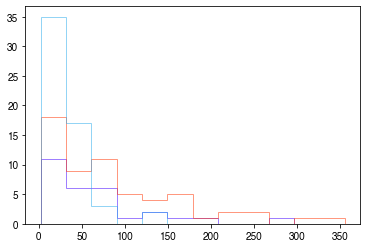

In [57]:
plt.hist(elapsed_time, color = colours, histtype = 'step', alpha = 0.5, bins = 12);

Text(0.5, 0, 'Elapsed time, 2hr')

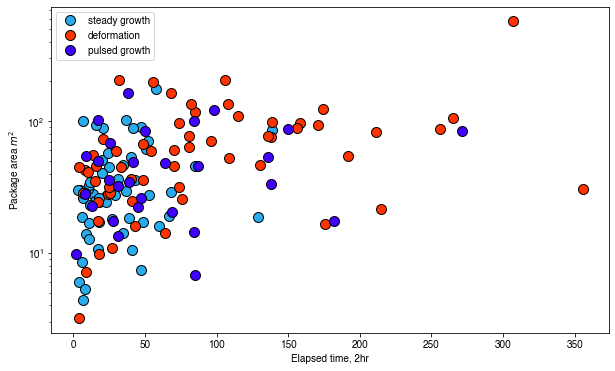

In [60]:
plt.figure(figsize = (10, 6))
plt.semilogy(elapsed_time.iloc[:lalen, 0], package_area.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:deflen, 1], package_area.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:smlen, 2], package_area.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package area $m^2$')
plt.xlabel('Elapsed time, 2hr')

Text(0.5, 0, 'Elapsed time, 2hr')

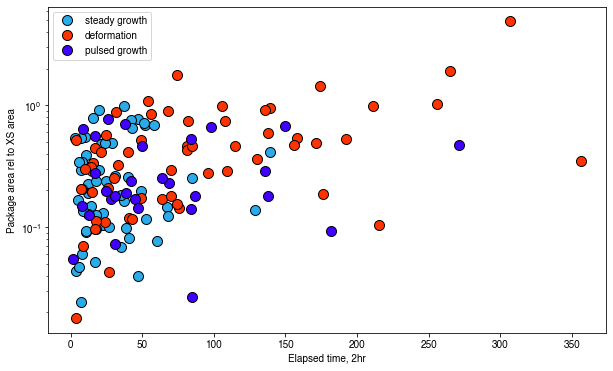

In [61]:
plt.figure(figsize = (10, 6))
plt.semilogy(elapsed_time.iloc[:lalen, 0], perc_area.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:deflen, 1], perc_area.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.semilogy(elapsed_time.iloc[:smlen, 2], perc_area.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package area rel to XS area')
plt.xlabel('Elapsed time, 2hr')

Text(0.5, 0, 'Package Width, m')

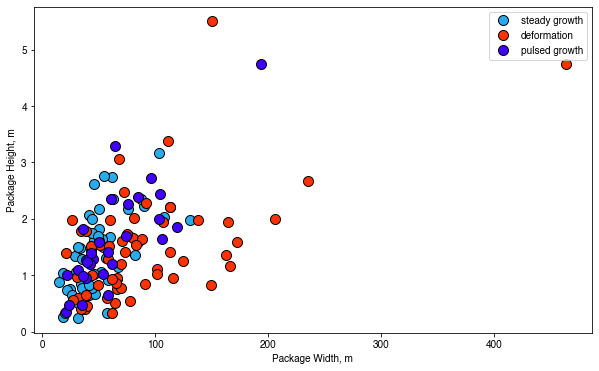

In [62]:
plt.figure(figsize = (10, 6))
plt.plot(packagewidth.iloc[:lalen, 0], package_height.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 10)
plt.plot(packagewidth.iloc[:deflen, 1], package_height.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'deformation', lw = 0, ms = 10)
plt.plot(packagewidth.iloc[:smlen, 2], package_height.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 10)
plt.legend()
plt.ylabel('Package Height, m')
plt.xlabel('Package Width, m')

Text(0, 0.5, 'Frequency')

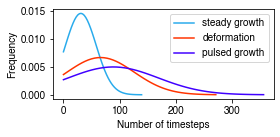

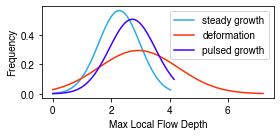

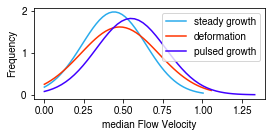

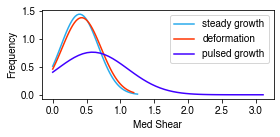

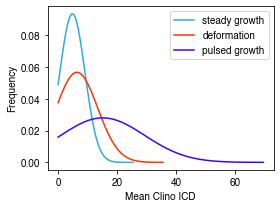

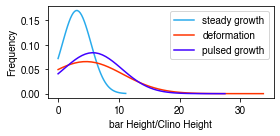

In [102]:
labels = ['steady growth', 'deformation', 'pulsed growth']

plt.figure(figsize = (4, 2), tight_layout = True)
for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['ElapsedTime'])
    scale = np.std(var['ElapsedTime'])

    x = np.linspace(0, (var['ElapsedTime']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('Number of timesteps')
plt.ylabel('Frequency')
#plt.xlim(0,310)
#plt.ylim(0, 1)
plt.figure(figsize = (4,2), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MaxFlowDepth'])
    scale = np.std(var['MaxFlowDepth'])

    x = np.linspace(0, (var['MaxFlowDepth']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('Max Local Flow Depth')
plt.ylabel('Frequency')

plt.figure(figsize = (4,2), tight_layout = True)
ax = plt.gca()
for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MedVelocity'])
    scale = np.std(var['MedVelocity'])

    x = np.linspace(0, (var['MedVelocity']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    ax.plot(x, y, label = labels[i], c = colours[i])
    
plt.legend()
plt.xlabel('median Flow Velocity')
plt.ylabel('Frequency')

plt.figure(figsize = (4,2), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MedShear'])
    scale = np.std(var['MedShear'])

    x = np.linspace(0, (var['MedShear']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('Med Shear')
plt.ylabel('Frequency')

plt.figure(figsize = (4,3), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['MeanClinoICD'])
    scale = np.std(var['MeanClinoICD'])

    x = np.linspace(0, (var['MeanClinoICD']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])

plt.legend()
plt.xlabel('Mean Clino ICD')
plt.ylabel('Frequency')

plt.figure(figsize = (4,2), tight_layout = True)

for i, var in enumerate([LA, SM, DEF]):
    loc = np.nanmean(var['BarHeight']/var['ModeClinoHt'])
    scale = np.std(var['BarHeight']/var['ModeClinoHt'])

    x = np.linspace(0, (var['BarHeight']/var['ModeClinoHt']).max())
    y = stats.norm.pdf(x, loc, scale)
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    plt.plot(x, y, label = labels[i], c = colours[i])
plt.legend()
plt.xlabel('bar Height/Clino Height')
plt.ylabel('Frequency')

In [79]:
sections = np.unique(megamerge['iloc'])
barcodes = np.unique(megamerge['barcode'])
sectiondist = np.empty([len(sections), len(sheetlist)])
for i, iloc in enumerate(sections):
    inthere = megamerge['barcode'][megamerge['iloc']==iloc] ##find the facies in each section
    for j, lbl in enumerate(barcodes):
        sectiondist[i, j] = np.sum(inthere.str.count(lbl))
#     sectiondist[i, 2] = np.sum(inthere.str.count("SM"))
#     sectiondist[i, 0] = np.sum(inthere.str.count("LA"))



KeyError: 'pkg_type'

In [72]:
# plt.figure(figsize = (20, 6))
# plt.xlim(0, 10000)
# w=100
# for i in range(0, len(sectiondist)):
#     plt.bar(sections[i]*10, sectiondist[i, 0], w, color=colours[0], ec = 'k')
# for x in range (0, len(sections)):
#     for i in [1, 2]:
#         #fac = plt.bar(x, xs_freq[i, x], w, bottom = np.sum(xs_freq[:i, x]), color = clist[i])
#         plt.bar(sections[x]*10, sectiondist[x, i], w, bottom = np.sum(sectiondist[x, :i]), color = colours[i], ec = 'k')
# ax=plt.gca()
# # 

## Cluster 1--Geometric relationships

fig, ax = plt.subplots(2, 3, figsize = (12, 9), tight_layout = True, sharex = False, squeeze = True)

ax = ax.ravel()

medianprops = dict(linestyle='--', linewidth=1.5, color='k')
boxprops = dict(linestyle='--', linewidth=1.5, color='black')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='black')
capprops = dict(linestyle='-', linewidth=1.5, color='black')
bplotaxes = [0, 1, 3, 4, -1]
flierprops = dict(marker = 'o', markersize = '2.5', color = 'black', mfc = 'k')
for a in bplotaxes:
    ax[a].set_xlim(-0.25, 1.25)
vlist = [packagewidth, package_height, xsarea, perc_area, pkg_modeht]
vnmlist = ['Unit Width, m', 'Unit Height, m', 'Unit Area, $m^2$', 'Unit Area relative to cross-section area', 'Clinothem/Package height']

colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
for idx, var in enumerate(vlist):
    bplotla = ax[bplotaxes[idx]].boxplot(var.iloc[:39, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotsm = ax[bplotaxes[idx]].boxplot(var.iloc[:45, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotdef = ax[bplotaxes[idx]].boxplot(var.iloc[:21, 2], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[bplotaxes[idx]].set_title(vnmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    
for i, var in enumerate([LA, DEF, SM]):
    locme = np.nanmean(var['MeanClinoHt']) #mean
    scaleme = np.std(var['MeanClinoHt'])
    
    locmo = np.nanmean(var['ModeClinoHt']) #mode
    scalemo = np.std(var['ModeClinoHt'])
    
    locmd = np.nanmean(var['MedClinoHt']) #median
    scalemd = np.std(var['MedClinoHt'])

    xme = np.linspace(0, var['MeanClinoHt'].max())
    yme = stats.norm.pdf(xme, locme, scaleme)
    xmo = np.linspace(0, var['ModeClinoHt'].max())
    ymo = stats.norm.pdf(xmo, locmo, scalemo)
    xmd = np.linspace(0, var['MedClinoHt'].max())
    ymd = stats.norm.pdf(xmd, locmd, scalemd)
    
    ax[2].set_title('Distribution of internal clinothem heights, m')
    #plt.hist(var['time_int_hrs'], bins = 40, fc = colours[i], ec = 'k', density = True, alpha = 0.5)
    me = ax[2].plot(xme, yme, label = labels[i], c = colours[i], ls = '--', alpha = 0.5)
    mo = ax[2].plot(xmo, ymo, c = colours[i], ls = '-', lw = 2)
    #md = ax[2].plot(xmd, ymd, c = colours[i], ls = '-.', alpha = 0.5)
#    x.boxplot([values_cg, values_eg], widths=1)
ax[2].legend([5, 6], labels = ['Median', 'Mode'])
ax[4].set_ylim(0, 1)
# plt.savefig(f'{savefilesto}clus1-boxplots.png', dpi = 300)

#### Cluster 2--relative to flow

fig, ax = plt.subplots(1, 3, figsize = (12, 4.6), tight_layout = True, squeeze = True)
ax[0].set_xlim(-0.25, 1.25)
ax[1].set_xlim(-0.25,1.25)
ax = ax.ravel()
bplotaxes = [0, 1]
vlist = [depth, bh_flowdep]
vnmlist = ['Maximum Local Flow Depth, m', 'Clinothem height relative to Flow Depth']# 'Unit Area, $m^2$', 'Unit Area relative to cross-section area', 'Clinothem/Package height']

colours = ['#29abec', '#ff3300', '#4000ff'] ## LA, def, sm
for idx, var in enumerate(vlist):
    bplotla = ax[bplotaxes[idx]].boxplot(var.iloc[:lalen, 0], patch_artist = True, positions = [0], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotsm = ax[bplotaxes[idx]].boxplot(var.iloc[:deflen, 1], patch_artist = True, positions = [0.5], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotdef = ax[bplotaxes[idx]].boxplot(var.iloc[:smlen, 2], patch_artist = True, positions = [1], boxprops=boxprops, medianprops=medianprops, widths = .4, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    bplotlist = [bplotla, bplotsm, bplotdef]    

    ax[bplotaxes[idx]].set_title(vnmlist[idx])
    for i, bplot in enumerate(bplotlist): 
        for patch, color in zip(bplot['boxes'], colours):
            patch.set_facecolor(colours[i])
    
ax[2].loglog(elapsed_time.iloc[:lalen, 0], pkg_qs.iloc[:lalen, 0], marker = 'o', mfc = colours[0], mec = 'k', label = 'steady growth', lw = 0, ms = 9)
ax[2].loglog(elapsed_time.iloc[:deflen, 1], pkg_qs.iloc[:deflen, 1], marker = 'o', mfc = colours[1], mec = 'k', label = 'reworking', lw = 0, ms = 9)
ax[2].loglog(elapsed_time.iloc[:smlen, 2], pkg_qs.iloc[:smlen, 2], marker = 'o', mfc = colours[2], mec = 'k', label = 'pulsed growth', lw = 0, ms = 9)
ax[2].set_ylabel('Package area / Bulk sediment supply, T$-1$')
ax[2].set_xlabel('Length of depositon, T')
# plt.savefig(f'{savefilesto}clus2-boxplots.png', dpi = 200)

In [79]:
crosatom = ((0.17*9.81)*(-7*(50**3)*-0.00137)/(((1.7*0.00031)**0.5)*(((2**(1/6))/0.12)*100)))**0.5
print(crosatom) ##check this

9.648846795342303


In [32]:

# labels = ['steady growth', 'pulsed growth', 'deformation']
# percent_abundance_true = (np.sum(sectiondist, axis = 0)/(39+45+21))*100
# for_m_1 = [45, 35, 20] ##meandering planform
# for_m_10 = [20, 65, 15]
# fig, ax = plt.subplots(1, 3, figsize = (10, 5), tight_layout = True)

# braidedpie = ax[0].pie(percent_abundance_true, labels = labels, colors = colours);
# with plt.xkcd():
#     meanderpie = ax[1].pie(for_m_1, labels = labels, colors = colours)
# #    braidpie = ax[2].bar(labels, for_m_10, labels = labels, colors = colours)


## For planform change

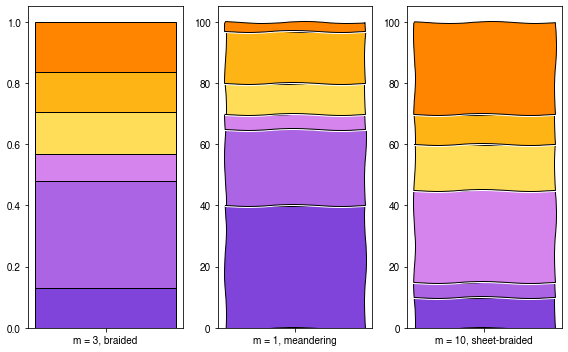

In [31]:
sectiondist = [baclen, baglen, pplen, tinflen, cohlen, incohlen]
labels = ['m = 3, braided', 'm = 1, meandering', 'm = 10, sheet-braided']
matrix = np.array([[baclen/np.sum(sectiondist), 40, 10],
                   [baglen/np.sum(sectiondist), 25, 5],
                   [pplen/np.sum(sectiondist), 5, 30], 
                   [tinflen/np.sum(sectiondist), 10, 15],
                   [cohlen/np.sum(sectiondist), 17, 10],
                   [incohlen/np.sum(sectiondist), 3, 30]])
w = 0.5

fig, ax = plt.subplots(1, 3, figsize = (8, 5), tight_layout = True)
ax[0].bar(labels[0], matrix[0, 0], w, color = colours[0], ec = 'k')
ax[0].bar(labels[0], matrix[1, 0], w, color = colours[1], bottom = np.sum(matrix[0, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[2, 0], w, color = colours[2], bottom = np.sum(matrix[0:2, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[3, 0], w, color = colours[3], bottom = np.sum(matrix[0:3, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[4, 0], w, color = colours[4], bottom = np.sum(matrix[0:4, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[5, 0], w, color = colours[5], bottom = np.sum(matrix[0:5, 0]), ec = 'k')

with plt.xkcd():
    ax[1].bar(labels[1], matrix[0, 1], w, color = colours[0], ec = 'k')
    ax[1].bar(labels[1], matrix[1, 1], w, color = colours[1], bottom = np.sum(matrix[0, 1]), ec = 'k')
    ax[1].bar(labels[1], matrix[2, 1], w, color = colours[2], bottom = np.sum(matrix[0:2, 1]), ec = 'k')
    ax[1].bar(labels[1], matrix[3, 1], w, color = colours[3], bottom = np.sum(matrix[0:3, 1]), ec = 'k')
    ax[1].bar(labels[1], matrix[4, 1], w, color = colours[4], bottom = np.sum(matrix[0:4, 1]), ec = 'k')
    ax[1].bar(labels[1], matrix[5, 1], w, color = colours[5], bottom = np.sum(matrix[0:5, 1]), ec = 'k')

    ax[2].bar(labels[2], matrix[0, 2], w, color = colours[0], ec = 'k')
    ax[2].bar(labels[2], matrix[1, 2], w, color = colours[1], bottom = np.sum(matrix[0, 2]), ec = 'k')
    ax[2].bar(labels[2], matrix[2, 2], w, color = colours[2], bottom = np.sum(matrix[0:2, 2]), ec = 'k')
    ax[2].bar(labels[2], matrix[3, 2], w, color = colours[3], bottom = np.sum(matrix[0:3, 2]), ec = 'k')
    ax[2].bar(labels[2], matrix[4, 2], w, color = colours[4], bottom = np.sum(matrix[0:4, 2]), ec = 'k')
    ax[2].bar(labels[2], matrix[5, 2], w, color = colours[5], bottom = np.sum(matrix[0:5, 2]), ec = 'k')
# plt.savefig(f'{savefilesto}schema-m.png', dpi = 200)    

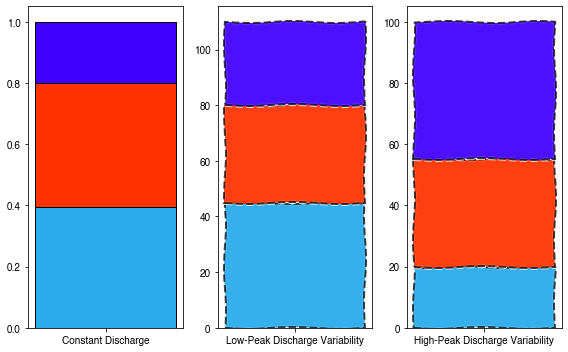

In [87]:
labels = ['Constant Discharge', 'Low-Peak Discharge Variability', 'High-Peak Discharge Variability']
matrix = np.array([[lalen/np.sum(sectiondist), 45, 20],
         [deflen/np.sum(sectiondist), 35, 35],
         [smlen/np.sum(sectiondist), 30, 45]])
w = 0.5

fig, ax = plt.subplots(1, 3, figsize = (8, 5), tight_layout = True)
ax[0].bar(labels[0], matrix[0, 0], w, color = colours[0], ec = 'k')
ax[0].bar(labels[0], matrix[1, 0], w, color = colours[1], bottom = np.sum(matrix[0, 0]), ec = 'k')
ax[0].bar(labels[0], matrix[2, 0], w, color = colours[2], bottom = np.sum(matrix[0:2, 0]), ec = 'k')

with plt.xkcd():
    ax[1].bar(labels[1], matrix[0, 1], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[1, 1], w, color = colours[1], bottom = np.sum(matrix[0, 1]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[1].bar(labels[1], matrix[2, 1], w, color = colours[2], bottom = np.sum(matrix[0:2, 1]), ec = 'k', alpha = .75, lw = 2, ls = '--')
    
    ax[2].bar(labels[2], matrix[0, 2], w, color = colours[0], ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[1, 2], w, color = colours[1], bottom = np.sum(matrix[0, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    ax[2].bar(labels[2], matrix[2, 2], w, color = colours[2], bottom = np.sum(matrix[0:2, 2]), ec = 'k', alpha = 0.75, lw = 2, ls = '--')
    
# plt.savefig(f'{savefilesto}schema-dv.png', dpi = 200)